Import modules we need and read in the data

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import math
import warnings
warnings.filterwarnings("ignore")

data1 = pd.read_csv("../../resource/ModelCreation/worldVaccinesCleanSimple.csv")
data1

,country,date,people_fully_vaccinated_per_hundred
0,Africa,2021-02-03,0.00
1,Africa,2021-02-04,0.00
2,Africa,2021-02-05,0.00
3,Africa,2021-02-06,0.00
4,Africa,2021-02-08,0.00
...,...,...,...
9761,World,2021-06-25,10.48
9762,World,2021-06-26,10.56
9763,World,2021-06-27,10.64
9764,World,2021-06-28,10.73


First convert the date column from a string to a datetime, then change that datetime into a timedelta

In [6]:
data1.date = pd.to_datetime(data1.date,format="%Y-%m-%d") # Convert date strings to datetime objects
mindate1 = data1.date.min() # Save min for when we take in input
data1.date = data1.date - data1.date.min()
data1

,country,date,people_fully_vaccinated_per_hundred
0,Africa,54 days,0.00
1,Africa,55 days,0.00
2,Africa,56 days,0.00
3,Africa,57 days,0.00
4,Africa,59 days,0.00
...,...,...,...
9761,World,196 days,10.48
9762,World,197 days,10.56
9763,World,198 days,10.64
9764,World,199 days,10.73


Next, convert these timedeltas into integers (number of days since the first entry)

In [7]:
data1.date = pd.Series([x.days for x in data1.date])
data1

,country,date,people_fully_vaccinated_per_hundred
0,Africa,54,0.00
1,Africa,55,0.00
2,Africa,56,0.00
3,Africa,57,0.00
4,Africa,59,0.00
...,...,...,...
9761,World,196,10.48
9762,World,197,10.56
9763,World,198,10.64
9764,World,199,10.73


Convert this data into a dictionary of value with a dataFrame corresponding to the country as the key

In [8]:
datadict1 = dict()
for c in data1.country.unique():
    tmpdata = data1.loc[data1.country==c] # Get the data where the country column equals the certain country
    tmpdata.drop("country",axis=1,inplace=True) # Drop the country column because this value will be the same for this table
    datadict1[c] = {"data":tmpdata} # Set the value for the key at country c to be the data we just extracted
datadict1["United States"]["data"] # Show the data for the US to just make sure it worked as intended

,date,people_fully_vaccinated_per_hundred
9085,34,0.40
9086,35,0.48
9087,39,0.60
9088,40,0.65
9089,41,0.72
...,...,...
9242,196,45.33
9243,197,45.50
9244,198,45.76
9245,199,45.98


This data is ready to be used in a model.

Read csv corresponding to our second model

In [24]:
countriesFile = open("../../resource/ModelCreation/fullData/countries.txt","r")
countries = countriesFile.read()
datadict2 = dict()
for c in countries.split(","):
    datadict2[c] = {"data":pd.read_csv("../../resource/ModelCreation/fullData/"+c+".csv")}
countriesFile.close()

Let's convert the datetime into a timedelta

In [25]:
for c in datadict2.keys():
    datadict2[c]["data"].date = pd.to_datetime(datadict2[c]["data"].date,format="%Y-%m-%d") # Convert date strings to datetime objects
    datadict2[c]["minDate"] = datadict2[c]["data"].date.min() # Save min for when we take in input
    datadict2[c]["data"].date = datadict2[c]["data"].date - datadict2[c]["minDate"]
def printDate():
    for c in datadict2.keys():
        print(datadict2[c]["data"].date)
printDate()

0       0 days
1       1 days
2       2 days
3       3 days
4       5 days
        ...   
126   128 days
127   129 days
128   130 days
129   131 days
130   132 days
Name: date, Length: 131, dtype: timedelta64[ns]
0       0 days
1       1 days
2       3 days
3       4 days
4       5 days
        ...   
136   142 days
137   143 days
138   144 days
139   145 days
140   146 days
Name: date, Length: 141, dtype: timedelta64[ns]
0       0 days
1       1 days
2       2 days
3       3 days
4       4 days
        ...   
158   158 days
159   159 days
160   160 days
161   161 days
162   162 days
Name: date, Length: 163, dtype: timedelta64[ns]
0       0 days
1       1 days
2       2 days
3       3 days
4       4 days
        ...   
146   146 days
147   147 days
148   148 days
149   149 days
150   150 days
Name: date, Length: 151, dtype: timedelta64[ns]
0       0 days
1       1 days
2       2 days
3       3 days
4       4 days
        ...   
97     97 days
98     98 days
99     99 days
100   100 day

Change the timedelta into just an integer

In [26]:
for c in datadict2.keys():
    datadict2[c]["data"].date = pd.Series([x.days for x in datadict2[c]["data"].date])
printDate()

0        0
1        1
2        2
3        3
4        5
      ... 
126    128
127    129
128    130
129    131
130    132
Name: date, Length: 131, dtype: int64
0        0
1        1
2        3
3        4
4        5
      ... 
136    142
137    143
138    144
139    145
140    146
Name: date, Length: 141, dtype: int64
0        0
1        1
2        2
3        3
4        4
      ... 
158    158
159    159
160    160
161    161
162    162
Name: date, Length: 163, dtype: int64
0        0
1        1
2        2
3        3
4        4
      ... 
146    146
147    147
148    148
149    149
150    150
Name: date, Length: 151, dtype: int64
0        0
1        1
2        2
3        3
4        4
      ... 
97      97
98      98
99      99
100    100
101    101
Name: date, Length: 102, dtype: int64
0        0
1        1
2        2
3        3
4        4
      ... 
162    163
163    164
164    165
165    166
166    167
Name: date, Length: 167, dtype: int64
0        0
1        1
2        2
3        3
4 

Now, let's scale all of our data to be in the range of 0 to 100, except people_fully_vaccinated_per_hundred_2

In [29]:
datadict2["United States"]["data"]

,date,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,people_fully_vaccinated_per_hundred_2
0,0,10.368,0.94,5.489,0.126,7.9,0.40,2234.0,71.76,1.27
1,1,10.272,0.93,5.439,0.121,8.3,0.48,2388.0,71.76,1.43
2,5,9.267,0.86,5.149,0.113,8.8,0.60,2725.0,71.76,1.81
3,6,9.436,0.86,5.159,0.109,9.2,0.65,2668.0,71.76,1.92
4,7,9.524,0.85,5.146,0.107,9.3,0.72,2733.0,71.76,2.07
...,...,...,...,...,...,...,...,...,...,...
141,148,1.175,0.87,2.115,0.019,52.6,42.49,3156.0,46.76,45.33
142,149,1.135,0.85,2.090,0.019,52.6,42.79,3351.0,46.76,45.50
143,150,1.110,0.84,2.081,0.018,55.6,43.03,3282.0,46.76,45.76
144,151,1.048,0.83,2.062,0.018,55.6,43.33,3329.0,46.76,45.98


In [30]:
for c in datadict2.keys():
    datadict2[c]["scalers"] = dict()
    for col in datadict2[c]["data"].columns:
        if col == "people_fully_vaccinated_per_hundred_2":
            continue
        datadict2[c]["scalers"][col] = MinMaxScaler(feature_range=(0,100))
        datadict2[c]["data"][col] = datadict2[c]["scalers"][col].fit_transform(np.array(datadict2[c]["data"][col]).reshape(-1,1))
datadict2["United States"]["data"]

,date,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,people_fully_vaccinated_per_hundred_2
0,0.000000,100.000000,58.974359,100.000000,100.000000,0.000000,0.000000,0.000000,100.0,1.27
1,0.657895,98.971171,56.410256,98.554078,95.370370,0.838574,0.185228,1.952828,100.0,1.43
2,3.289474,88.200622,38.461538,90.167727,87.962963,1.886792,0.463070,6.226224,100.0,1.81
3,3.947368,90.011789,38.461538,90.456912,84.259259,2.725367,0.578838,5.503424,100.0,1.92
4,4.605263,90.954882,35.897436,90.080972,82.407407,2.935010,0.740912,6.327669,100.0,2.07
...,...,...,...,...,...,...,...,...,...,...
141,97.368421,1.478941,41.025641,2.429150,0.925926,93.710692,97.453114,11.691605,0.0,45.33
142,98.026316,1.050263,35.897436,1.706189,0.925926,93.710692,98.147719,14.164342,0.0,45.50
143,98.684211,0.782338,33.333333,1.445922,0.000000,100.000000,98.703404,13.289374,0.0,45.76
144,99.342105,0.117887,30.769231,0.896472,0.000000,100.000000,99.398009,13.885366,0.0,45.98


This data is now ready to be used in our second model

Create a class for the model

In [31]:
class RegressionModel:
    # Initialize data with trainX and triany, then find the correct equation to regress on
    def __init__(self,X,y,endSplit=False,indexThresh=-5):
        # By default, save all the train and test X and y as a fully random split of X and y
        self.trainX,self.testX,self.trainy,self.testy = train_test_split(X,y,test_size=.2)
        if endSplit:
            # If we want to split from the end, take the first elements and put it in train, and take the last elements and put it in test
            self.trainX = X[:int(len(X)*indexThresh)]
            self.testX = X[int(len(X)*indexThresh):]
            self.trainy = y[:int(len(X)*indexThresh)]
            self.testy = y[int(len(X)*indexThresh):]
        self.findRegress() # Call findRegress function
        
    def findRegress(self):
        # Set an initial model and score from fitting our model
        self.model, self.score = self.fit((False,False,False,False,False))
        self.regress_bool = (False,False,False,False,False)
        tmpbool = [True,False] # Create a list with True and False booleans for looping through
        # Loop through all possible boolean values
        for i1 in tmpbool:
            for i2 in tmpbool:
                for i3 in tmpbool:
                    for i4 in tmpbool:
                        for i5 in tmpbool:
                            # Run the fit function
                            tmpmodel, tmpscore = self.fit((i1,i2,i3,i4,i5))
                            # Check if this new model has a better score
                            if tmpscore > self.score:
                                # If the new model has a better score, update the model, score, and regress_bool
                                self.model = tmpmodel
                                self.score = tmpscore
                                self.regress_bool = (i1,i2,i3,i4,i5)
        
    def fit(self, regress_bool):
        trainX = self.transform(self.trainX.copy(), regress_bool) # Transform training x values
        testX = self.transform(self.testX.copy(), regress_bool) # Transform testing x values
        model = LinearRegression().fit(trainX,self.trainy) # Make a model fit with the training x and y values
        return (model, model.score(testX,self.testy)) # Return the model and the score from the testing values
        
    def transform(self, X, regress_bool):
        # Create a list of lambdas with formulas to transform values.
        transformation = [lambda x: x**2, lambda x: x**3, lambda x: x**4, lambda x: x**5, lambda x: math.exp(x)]
        newX = []
        # Loop through each row in the list
        for row in X:
            new_values = []
            # Loop through each possible transformation
            for j in range(len(regress_bool)):
                if regress_bool[j]:
                    # If we are supposed to transform the data, then loop through each initial X value
                    # Then transform that X value and add it to our row
                    for val in row:
                        new_values.append(transformation[j](val))
            newX.append(np.append(row, new_values))
        return newX
    
    def getRegressBool(self):
        return self.regress_bool
    
    def getScore(self):
        return self.score
        
    def predict(self,X,y):
        tmpX = self.transform(X.copy(), self.regress_bool) # Transform the data
        return (self.model.predict(tmpX), self.model.score(tmpX,y)) # Return the predicted y, and the score
    
    def finalFit(self,X,y):
        # Initialize training and test X and y to X and y.
        self.trainX = X
        self.testX = X
        self.trainy = y
        self.testy = y
        # Find regression again
        self.findRegress()

Let's test out whether this works on our first dictionary, using the United States data

In [32]:
X = datadict1["United States"]["data"]["date"].to_numpy().reshape(-1,1)
y = datadict1["United States"]["data"]["people_fully_vaccinated_per_hundred"].to_numpy()
test_model = RegressionModel(X,y)
print(test_model.getRegressBool())

(True, True, True, True, False)


Everything seems to be working well, so now run this code on every country in the datadict1 and add a model to each country.

In [33]:
def trainModel1(printResults=True,endSplit=False,indexThresh=-5):
    for c in sorted(datadict1.keys()):
        X = datadict1[c]["data"]["date"].to_numpy().reshape(-1,1)
        y = datadict1[c]["data"]["people_fully_vaccinated_per_hundred"].to_numpy()
        datadict1[c]["model"] = RegressionModel(X,y,endSplit,indexThresh)
        if printResults:
            print(c+":",datadict1[c]["model"].getRegressBool())
            print(datadict1[c]["model"].getScore())
trainModel1()

Africa: (True, True, True, True, False)
0.9874796926747064
Argentina: (True, True, True, True, False)
0.9941195879809551
Asia: (False, True, True, True, False)
0.9362714834371086
Austria: (True, True, False, True, False)
0.9982260012696642
Bahrain: (True, True, True, True, False)
0.9950730374299975
Belgium: (True, True, True, True, False)
0.9966925372497031
Bolivia: (True, True, True, True, False)
0.9933146378939582
Brazil: (True, True, True, True, False)
0.9971937316107099
Bulgaria: (True, True, True, True, False)
0.9966389935546381
Cambodia: (False, True, True, True, False)
0.9960193950011549
Canada: (True, True, True, True, False)
0.9918953528690775
Chile: (True, True, True, True, False)
0.9972177741723817
Croatia: (True, True, True, True, False)
0.9990605661464227
Czechia: (True, True, True, True, False)
0.9958788165557897
Denmark: (True, True, True, True, False)
0.9962922986496096
England: (True, True, True, False, False)
0.9990315527910928
Estonia: (True, True, True, True, False)

Train models for datadict2 and datadict3

In [34]:
def trainModel2(printResults=True,endSplit=False,indexThresh=-5):
    for c in sorted(datadict2.keys()):
        X = datadict2[c]["data"].drop("people_fully_vaccinated_per_hundred_2",axis=1).to_numpy()
        y = datadict2[c]["data"]["people_fully_vaccinated_per_hundred_2"].to_numpy()
        datadict2[c]["model"] = RegressionModel(X,y,endSplit,indexThresh)
        if printResults:
            print(c+":",datadict2[c]["model"].getRegressBool())
            print(datadict2[c]["model"].getScore())
trainModel2()

Africa: (True, True, False, False, False)
0.9966814109588122
Argentina: (False, True, True, True, False)
0.9996643905971623
Asia: (True, False, False, False, False)
0.9987048223446358
Austria: (True, True, False, False, False)
0.9998005171455503
Bahrain: (True, True, False, False, False)
0.9984826825667936
Belgium: (False, True, False, False, False)
0.9995705829722736
Bulgaria: (True, True, True, True, False)
0.999719708255597
Cambodia: (True, True, True, False, False)
0.9998602830742886
Canada: (True, True, True, False, False)
0.9996972939109552
Chile: (True, True, True, True, False)
0.9997454288573101
Czechia: (False, True, True, True, False)
0.9996768074077687
Denmark: (False, True, True, True, False)
0.9997790109889874
Estonia: (True, True, True, True, False)
0.9992681502331389
Europe: (True, True, True, True, False)
0.9999387863621801
European Union: (False, False, True, True, False)
0.9998696430049822
France: (True, False, True, True, False)
0.9999158200738322
Germany: (True, Fal

Let's see how well the models stack up against each other

In [35]:
def printAll():
    for c in datadict1.keys():
        print(c)
        print("Model 1:",datadict1[c]["model"].getScore(), "Len:", len(datadict1[c]["data"]))
        try:
            print("Model 2:",datadict2[c]["model"].getScore(), "Len:", len(datadict2[c]["data"]))
        except:
            pass
printAll()

Africa
Model 1: 0.9874796926747064 Len: 145
Model 2: 0.9966814109588122 Len: 131
Argentina
Model 1: 0.9941195879809551 Len: 157
Model 2: 0.9996643905971623 Len: 141
Asia
Model 1: 0.9362714834371086 Len: 177
Model 2: 0.9987048223446358 Len: 163
Austria
Model 1: 0.9982260012696642 Len: 165
Model 2: 0.9998005171455503 Len: 151
Bahrain
Model 1: 0.9950730374299975 Len: 116
Model 2: 0.9984826825667936 Len: 102
Belgium
Model 1: 0.9966925372497031 Len: 181
Model 2: 0.9995705829722736 Len: 167
Bolivia
Model 1: 0.9933146378939582 Len: 100
Brazil
Model 1: 0.9971937316107099 Len: 123
Bulgaria
Model 1: 0.9966389935546381 Len: 163
Model 2: 0.999719708255597 Len: 149
Cambodia
Model 1: 0.9960193950011549 Len: 123
Model 2: 0.9998602830742886 Len: 107
Canada
Model 1: 0.9918953528690775 Len: 175
Model 2: 0.9996972939109552 Len: 161
Chile
Model 1: 0.9972177741723817 Len: 166
Model 2: 0.9997454288573101 Len: 152
Croatia
Model 1: 0.9990605661464227 Len: 100
Czechia
Model 1: 0.9958788165557897 Len: 165
Model

I notice that all of these models are doing extremely well for pretty much every category. I also notice that none of these models use the exponential lambda function. On top of that, the third model that takes into account the most information is still effective at greater than .9 

Let's compare how each of these models performed by calculating the average r-squared values.

In [37]:
model1sum = 0
model2sum = 0
model3sum = 0
for c in datadict1.keys():
    model1sum += datadict1[c]["model"].getScore()
    try:
        model2sum += datadict2[c]["model"].getScore()
    except:
        pass
    
print("Model 1:", model1sum/len(datadict1.keys()))
print("Model 2:", model2sum/len(datadict2.keys()))

Model 1: 0.992963473246677
Model 2: 0.9992669721176065


This evaluation shows that model 2 and model 3 are about the same, and both do better than model 1. Now this is not necessarily significant because the value for model 1 is still really good. However, this does show that the added features increased the performance of the model.

Now these models are all good, but in terms of real world application, we aren't going to know future data, so I also want to test if these models work well if we split the training and testing sets by having the training set be the values with the earliest dates while the testing set has values with the latest dates.

Now retrain the models

In [38]:
trainModel1(endSplit=True,indexThresh=.8)

Africa: (True, True, True, False, False)
-1.692267513032856
Argentina: (False, True, False, False, False)
0.7032049555167772
Asia: (False, False, False, True, False)
0.10543217872978938
Austria: (False, False, False, True, False)
0.5714876760006355
Bahrain: (False, False, False, False, False)
0.950287739103711
Belgium: (False, False, True, True, False)
0.9093583202196707
Bolivia: (True, False, True, True, False)
0.8813227326283385
Brazil: (True, True, True, True, False)
-0.029512814120781217
Bulgaria: (True, False, False, False, False)
0.780420474629845
Cambodia: (True, False, True, True, False)
0.5038106232752229
Canada: (False, True, True, True, False)
-0.02797822157983121
Chile: (False, False, False, False, False)
0.9123657815298619
Croatia: (True, False, True, False, False)
0.9848876473883307
Czechia: (False, False, False, True, False)
0.09680731849960567
Denmark: (False, True, False, False, False)
0.8908774061351641
England: (True, True, True, False, False)
0.8957722635281189
Esto

Train models for datadict2 and datadict3

In [39]:
trainModel2(endSplit=True,indexThresh=.8)

Africa: (False, False, False, False, False)
-2.301279957863335
Argentina: (False, False, False, False, False)
0.5792564166304535
Asia: (False, False, False, False, False)
-0.9238926619927716
Austria: (False, False, False, False, False)
0.7666925569867381
Bahrain: (False, True, False, False, False)
-17.587278343128833
Belgium: (True, False, False, False, False)
-0.25262489977085667
Bulgaria: (False, False, False, False, False)
-3.4705799066288545
Cambodia: (False, False, False, False, False)
-5.037038146751991
Canada: (False, False, False, False, False)
-0.5513840590520174
Chile: (False, False, True, True, False)
0.5430289185141364
Czechia: (False, False, False, False, False)
0.13606161265229044
Denmark: (True, True, False, False, False)
0.8646172011432252
Estonia: (True, False, False, False, False)
-2.191632725482078
Europe: (False, False, True, False, False)
0.9613583444079459
European Union: (False, False, False, False, False)
0.9893507702067523
France: (False, False, False, False, F

Let's see how well the models stack up against each other

In [40]:
printAll()

Africa
Model 1: -1.692267513032856 Len: 145
Model 2: -2.301279957863335 Len: 131
Argentina
Model 1: 0.7032049555167772 Len: 157
Model 2: 0.5792564166304535 Len: 141
Asia
Model 1: 0.10543217872978938 Len: 177
Model 2: -0.9238926619927716 Len: 163
Austria
Model 1: 0.5714876760006355 Len: 165
Model 2: 0.7666925569867381 Len: 151
Bahrain
Model 1: 0.950287739103711 Len: 116
Model 2: -17.587278343128833 Len: 102
Belgium
Model 1: 0.9093583202196707 Len: 181
Model 2: -0.25262489977085667 Len: 167
Bolivia
Model 1: 0.8813227326283385 Len: 100
Brazil
Model 1: -0.029512814120781217 Len: 123
Bulgaria
Model 1: 0.780420474629845 Len: 163
Model 2: -3.4705799066288545 Len: 149
Cambodia
Model 1: 0.5038106232752229 Len: 123
Model 2: -5.037038146751991 Len: 107
Canada
Model 1: -0.02797822157983121 Len: 175
Model 2: -0.5513840590520174 Len: 161
Chile
Model 1: 0.9123657815298619 Len: 166
Model 2: 0.5430289185141364 Len: 152
Croatia
Model 1: 0.9848876473883307 Len: 100
Czechia
Model 1: 0.09680731849960567 Le

This model now shows significantly worse results, the results are good for some countries and bad for others. 

My overall conclusion is that these models are good at understanding how data is within a given data set, and the model seems not necessarily accurate for extrapolating and predicting in the future. However, let's evaluate why our models are not performing well.

Let's create a percentage of good models, I'm going to set the threshold to an r-squared value of .5

In [42]:
def countGoodModels(threshold = .5):
    model1count = 0
    model2count = 0
    model3count = 0
    for c in datadict1.keys():
        if (datadict1[c]["model"]).getScore() >= threshold:
            model1count += 1
        try:
            if (datadict2[c]["model"]).getScore() >= threshold:
                model2count += 1
            if (datadict3[c]["model"]).getScore() >= threshold:
                model3count += 1
        except:
            pass
    print("Model 1:", model1count/len(datadict1.keys()))
    print("Model 2:", model2count/len(datadict2.keys()))

countGoodModels(.5)    

Model 1: 0.7878787878787878
Model 2: 0.5


This is extremely interesting, because it seems as though our first model which only takes in a date performed significantly better than our models 2 and 3, which probably means that the extra data results in overfitting.

Now, let's retry this with higher thresholds.

In [43]:
for x in range(6,10):
    print("Threshold:",x/10)
    countGoodModels(x/10)

Threshold: 0.6
Model 1: 0.7272727272727273
Model 2: 0.38636363636363635
Threshold: 0.7
Model 1: 0.7121212121212122
Model 2: 0.3181818181818182
Threshold: 0.8
Model 1: 0.6212121212121212
Model 2: 0.2727272727272727
Threshold: 0.9
Model 1: 0.48484848484848486
Model 2: 0.18181818181818182


This shows that Model 1 performs better overall, using multiple different thresholds. This overall shows that Model 1 is the best model to use for predicting in the future.

Now, this test may also be biased because model 1 has more data than the others, so let's try only taking the countries where there is every type of model.

In [44]:
def countGoodModelsReduced(threshold = .5):
    model1count = 0
    model2count = 0
    model3count = 0
    for c in datadict2.keys():
        if (datadict1[c]["model"]).getScore() >= threshold:
            model1count += 1
        try:
            if (datadict2[c]["model"]).getScore() >= threshold:
                model2count += 1
            if (datadict3[c]["model"]).getScore() >= threshold:
                model3count += 1
        except:
            pass
    print("Model 1:", model1count/len(datadict1.keys()))
    print("Model 2:", model2count/len(datadict2.keys()))

for x in range(5,10):
    print("Threshold:",x/10)
    countGoodModels(x/10)   

Threshold: 0.5
Model 1: 0.7878787878787878
Model 2: 0.5
Threshold: 0.6
Model 1: 0.7272727272727273
Model 2: 0.38636363636363635
Threshold: 0.7
Model 1: 0.7121212121212122
Model 2: 0.3181818181818182
Threshold: 0.8
Model 1: 0.6212121212121212
Model 2: 0.2727272727272727
Threshold: 0.9
Model 1: 0.48484848484848486
Model 2: 0.18181818181818182


Here we find something very interesting, the first model still performs better at all thresholds, this means that models 2 and 3 are indeed overfitting, but also that models perform better when there is less data. This means that as countries increase how long they are vaccinating for, the prediction gets less accurate. This must mean that there is a point where countries stop vaccinating at a certain rate, and change. The model cannot predict this, but may be able to once there is more data.

Let's create some visuals to understand where our models are going wrong.

Let's look at our first model, for the data that did not do so well.

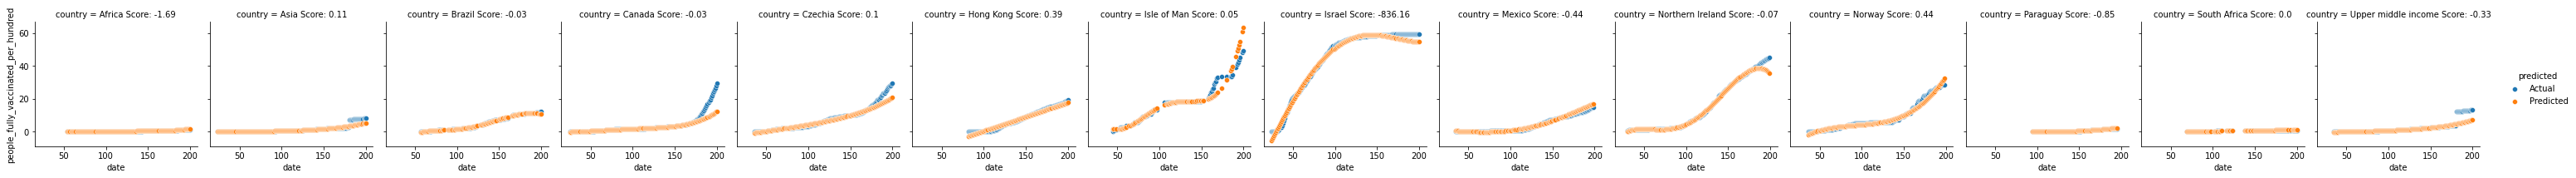

In [45]:
data = []
for c in datadict1.keys():
    if (datadict1[c]["model"]).getScore() < .5:
        graphData = datadict1[c]["data"].copy()
        graphData = graphData.loc[:,["date","people_fully_vaccinated_per_hundred"]]
        graphData["predicted"] = "Actual"
        X = datadict1[c]["data"].drop("people_fully_vaccinated_per_hundred", axis=1).to_numpy().reshape(-1,1)
        y = datadict1[c]["data"]["people_fully_vaccinated_per_hundred"].to_numpy()
        predicted = datadict1[c]["model"].predict(X,y)[0]
        predicted = pd.DataFrame(predicted, columns=["people_fully_vaccinated_per_hundred"])
        predicted["date"] = graphData["date"].to_numpy()
        predicted["predicted"] = "Predicted"
        graphData = pd.concat([graphData,predicted])
        graphData["country"] = c + " Score: " + str(round(datadict1[c]["model"].getScore(),2))
        data.append(graphData)
graph = sns.FacetGrid(pd.concat(data),col="country", hue="predicted")
graph.map(sns.scatterplot, "date", "people_fully_vaccinated_per_hundred")
graph.add_legend()

Now let's compare this to models that did perform well.

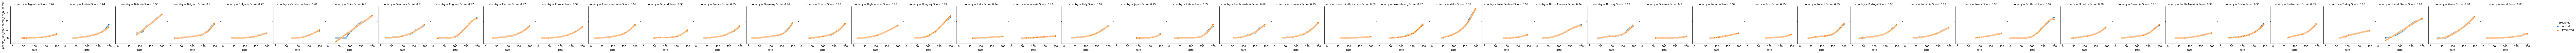

In [34]:
data = []
for c in datadict1.keys():
    if (datadict1[c]["model"]).getScore() >= .5:
        graphData = datadict1[c]["data"].copy()
        graphData = graphData.loc[:,["date","people_fully_vaccinated_per_hundred"]]
        graphData["predicted"] = "Actual"
        X = datadict1[c]["data"].drop("people_fully_vaccinated_per_hundred", axis=1).to_numpy().reshape(-1,1)
        y = datadict1[c]["data"]["people_fully_vaccinated_per_hundred"].to_numpy()
        predicted = datadict1[c]["model"].predict(X,y)[0]
        predicted = pd.DataFrame(predicted, columns=["people_fully_vaccinated_per_hundred"])
        predicted["date"] = graphData["date"].to_numpy()
        predicted["predicted"] = "Predicted"
        graphData = pd.concat([graphData,predicted])
        graphData["country"] = c + " Score: " + str(round(datadict1[c]["model"].getScore(),2))
        data.append(graphData)
graph = sns.FacetGrid(pd.concat(data),col="country", hue="predicted")
graph.map(sns.scatterplot, "date", "people_fully_vaccinated_per_hundred")
graph.add_legend()

Now let's compare this to our 2nd and 3rd models.

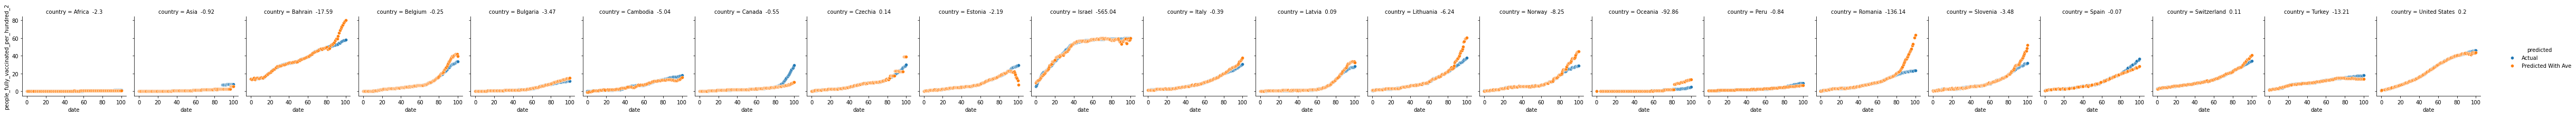

In [47]:
data = []
for c in datadict2.keys():
    if (datadict2[c]["model"]).getScore() < .5:
        graphData = datadict2[c]["data"].copy()
        graphData = graphData.loc[:,["date","people_fully_vaccinated_per_hundred_2"]]
        graphData["predicted"] = "Actual"
        X2 = datadict2[c]["data"].drop("people_fully_vaccinated_per_hundred_2", axis=1).to_numpy()
        y2 = datadict2[c]["data"]["people_fully_vaccinated_per_hundred_2"].to_numpy()
        predicted2 = datadict2[c]["model"].predict(X2,y2)[0]
        predicted2 = pd.DataFrame(predicted2, columns=["people_fully_vaccinated_per_hundred_2"])
        predicted2["date"] = graphData["date"].to_numpy()
        predicted2["predicted"] = "Predicted With Ave"
        graphData = pd.concat([graphData,predicted2])
        graphData["country"] = c + "  " + str(round(datadict2[c]["model"].getScore(),2))
        data.append(graphData)
graph = sns.FacetGrid(pd.concat(data),col="country", hue="predicted")
graph.map(sns.scatterplot, "date", "people_fully_vaccinated_per_hundred_2")
graph.add_legend()

Let's graph the actual and predicted values for the models that have good results, greater than or equal to .5 r-squared

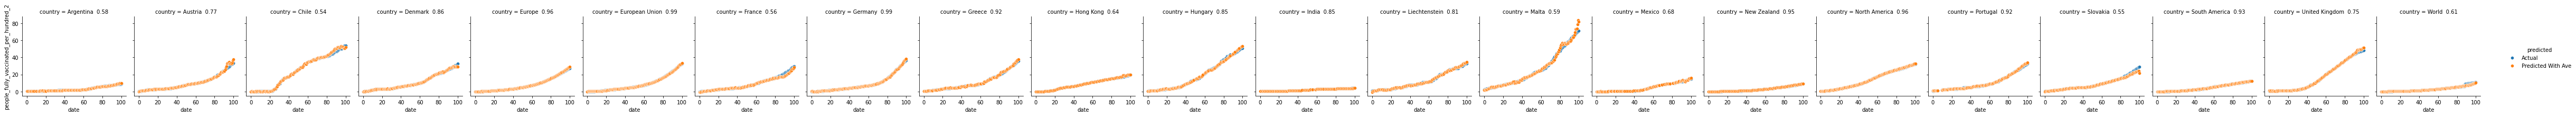

In [48]:
data = []
for c in datadict2.keys():
    if (datadict2[c]["model"]).getScore() >= .5:
        graphData = datadict2[c]["data"].copy()
        graphData = graphData.loc[:,["date","people_fully_vaccinated_per_hundred_2"]]
        graphData["predicted"] = "Actual"
        X2 = datadict2[c]["data"].drop("people_fully_vaccinated_per_hundred_2", axis=1).to_numpy()
        y2 = datadict2[c]["data"]["people_fully_vaccinated_per_hundred_2"].to_numpy()
        predicted2 = datadict2[c]["model"].predict(X2,y2)[0]
        predicted2 = pd.DataFrame(predicted2, columns=["people_fully_vaccinated_per_hundred_2"])
        predicted2["date"] = graphData["date"].to_numpy()
        predicted2["predicted"] = "Predicted With Ave"
        graphData = pd.concat([graphData,predicted2])
        graphData["country"] = c + "  " + str(round(datadict2[c]["model"].getScore(),2))
        data.append(graphData)
graph = sns.FacetGrid(pd.concat(data),col="country", hue="predicted")
graph.map(sns.scatterplot, "date", "people_fully_vaccinated_per_hundred_2")
graph.add_legend()

Looking at these graphs, we can see the overfitting part of models 2 and 3. There are many points that sporadically go up or down inside the lines, compared to the smooth lines of model 1. From this, we can see that model 1 is going to be the best choice for predicting % people fully vaccinated in the future.